## Rendu Projet MLOps

autrice  
nom : HASSANI               prénom : Youmna

In [1]:
# importer les bibliothèques nécessaires au projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

**1. Chargement des données**

In [2]:
# Lire le fichier csv de notre projet : collecte de nos données
df = pd.read_csv("C:/Users/youmn/OneDrive/Bureau/FAC/Master 1/Formation/MLOps/Loan_Data.csv")

**2. Inspection initiale des données / Exploration des données**

- Aperçu des données

In [3]:
# Aperçu des donnees
print(df.head()) # Afficher les premières lignes
print(df.info()) # Permet de connaitre le type de chaque variable
print(df.shape)  # Permet de connaitre la dimension du dataframe

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 

- Statistiques Descriptives

In [4]:
# on affiche les statistiques descriptives sous forme de tableau
statistiques_descriptives = df.describe()
print(statistiques_descriptives)  # Afficher les statistiques descriptives

        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min                 31.652732    1000.000000    

*Decription des Variables de Notre Jeu de Données*

- **customer_id** : Identifiant unique pour chaque client. Utile pour indexer les données mais ne contient aucune information analytique intrinsèque.  
- **credit_lines_outstanding** : Nombre de lignes de crédit actives. Peut être traitée comme numérique ou catégorique si le nombre de lignes est faible.  
- **loan_amt_outstanding** : Montant total en cours sur les prêts actifs. Une variable clé pour analyser le comportement de crédit.  
- **total_debt_outstanding** : Montant total de la dette actuelle du client. Crucial pour l'évaluation du risque financier.
- **income** : Revenu annuel du client. Important pour les modèles prédictifs liés à la capacité de paiement.  
- **years_employed** : Nombre d'années d'emploi. Indique la stabilité de l'emploi, souvent liée à la fiabilité de remboursement.  
- **fico_score** : Score FICO du client, un indicateur clé de la santé crédit.  
- **default** : Indicateur binaire (0 ou 1) si le client a fait défaut sur un prêt. Variable cible typique pour les modèles de prédiction de défaut.

**3. Nettoyage Des Données**

- Traitement des valeurs manquantes

In [5]:
# Identifier les valeurs manquantes
missing_percentage = df.isnull().mean() * 100 # Calculer le pourcentage de valeurs manquantes pour chaque colonne
print(missing_percentage) # Afficher le pourcentage de valeurs manquantes

customer_id                 0.0
credit_lines_outstanding    0.0
loan_amt_outstanding        0.0
total_debt_outstanding      0.0
income                      0.0
years_employed              0.0
fico_score                  0.0
default                     0.0
dtype: float64


Commentaires :   Le dataframe ne contient pas de valeurs manquantes, par conséquent le traitement des valeurs manquantes est désormais terminée

- Traitement des valeurs abérrantes

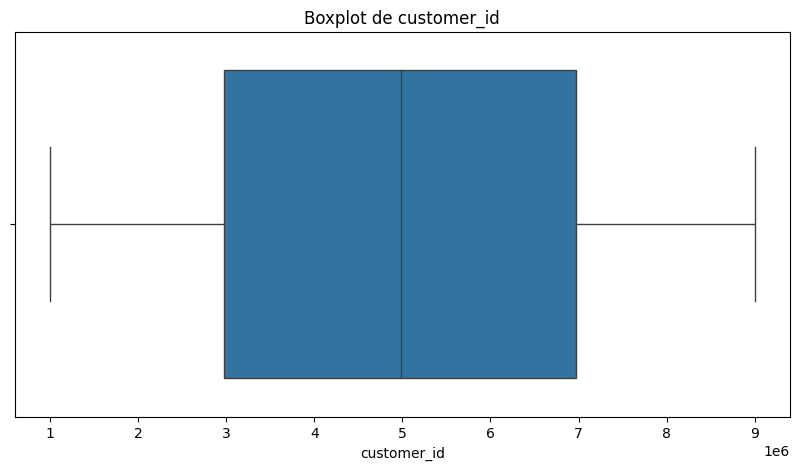

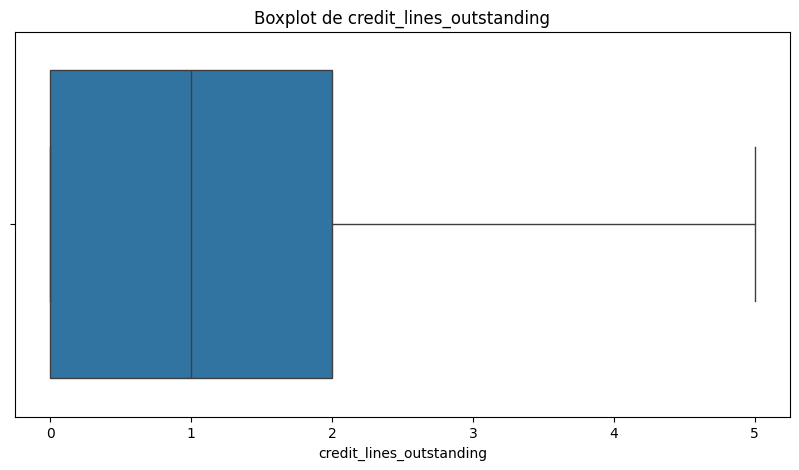

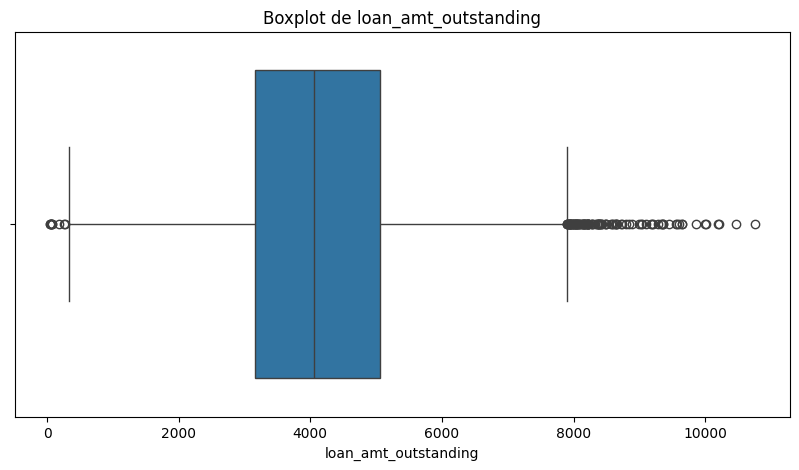

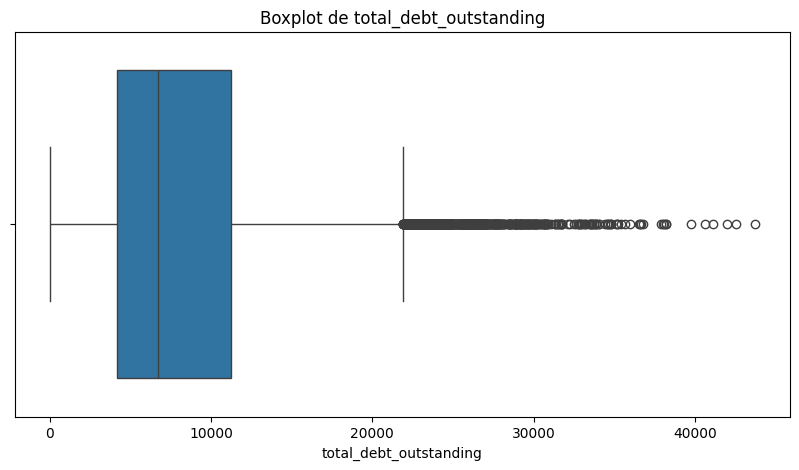

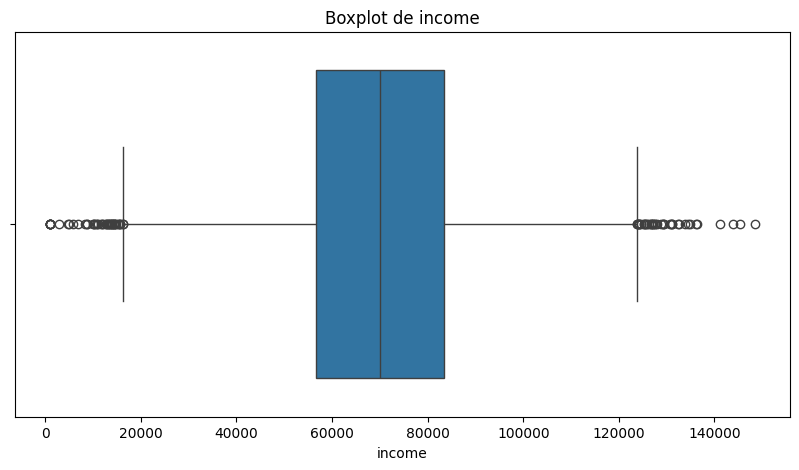

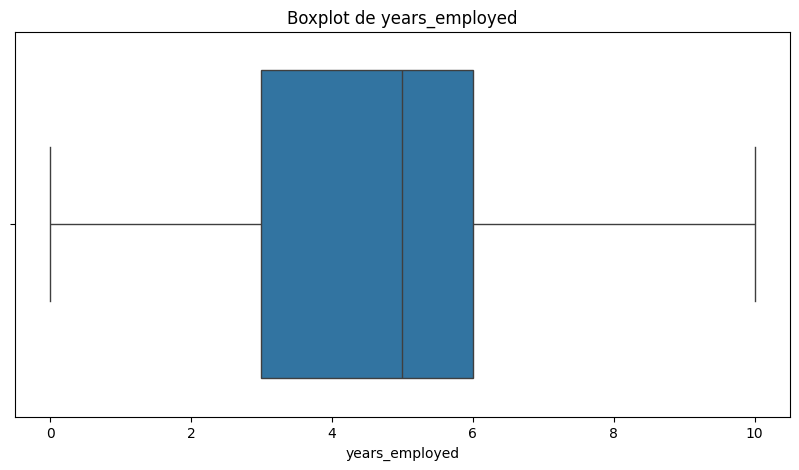

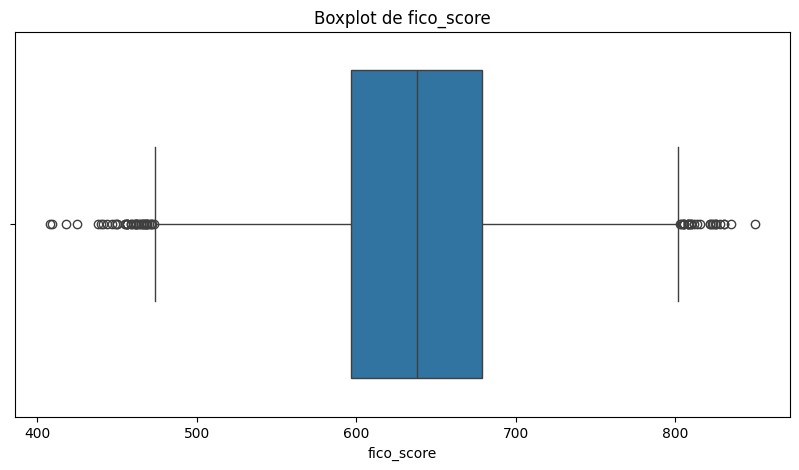

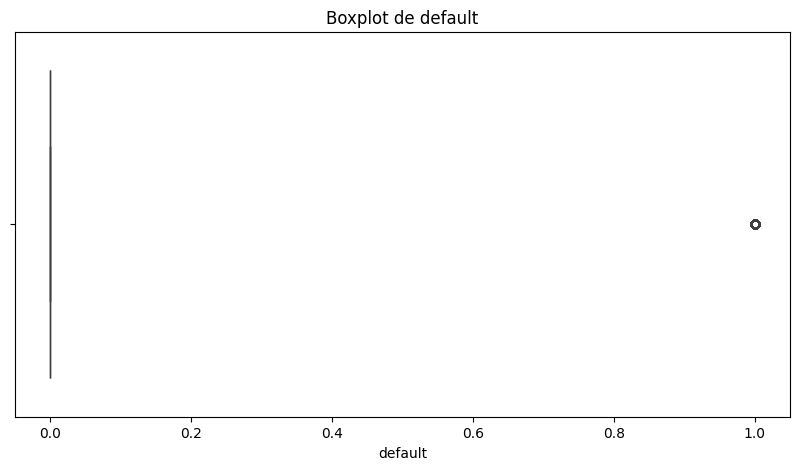

In [6]:
# Créer un boxplot pour chaque colonne numérique : visualisation des valeurs manquantes
# via la méthode de Box Plot
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

*Commentaires* : la variable default est une variable avec des valeurs numériques (1 ou 0) mais se comporte comme une variable catégorielle, cela explique pourquoi il n'y a pas de box plot qui s'affiche pour cette variable. Pour ce faire, nous allons analyser le nombre de valeurs uniques pour chaque variables de notre dataframe.

In [7]:
# traitement des valeurs manquantes via la méthode de l'écart interquartile (IQR)

# Calcul de l'IQR et filtrage des valeurs aberrantes
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtrer les valeurs aberrantes
df_filtered = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_filtered.shape)  # Afficher la nouvelle dimension après filtrage


(7982, 8)


In [8]:
# Comptage des valeurs uniques pour chaque colonne ;
# cela nous permet de mieux classer par la suite les variables
# en fonction de son type
print(df.nunique())

customer_id                 10000
credit_lines_outstanding        6
loan_amt_outstanding        10000
total_debt_outstanding      10000
income                       9995
years_employed                 11
fico_score                    374
default                         2
dtype: int64


- Suppression des doublons

In [9]:
df = df.drop_duplicates()
print(df.shape)
print(df.columns)

(10000, 8)
Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')


A partir des valeurs uniques, nous constatons que 3 variables n'ont pas beaucoup de valeurs différentes, ce qui nous permets de scinder en deux groupes distincts : les variables continues que nous nommerons numerical_var et les variables classées par catégories qui sont classées dans categorical_var.  
La variable default est la variable cible de notre dataframe.

- *Analyse des Relations entre Variables*

In [10]:
numerical_vars = ['customer_id', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
categorical_vars = ['credit_lines_outstanding', 'years_employed', 'default']

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\1671443595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives


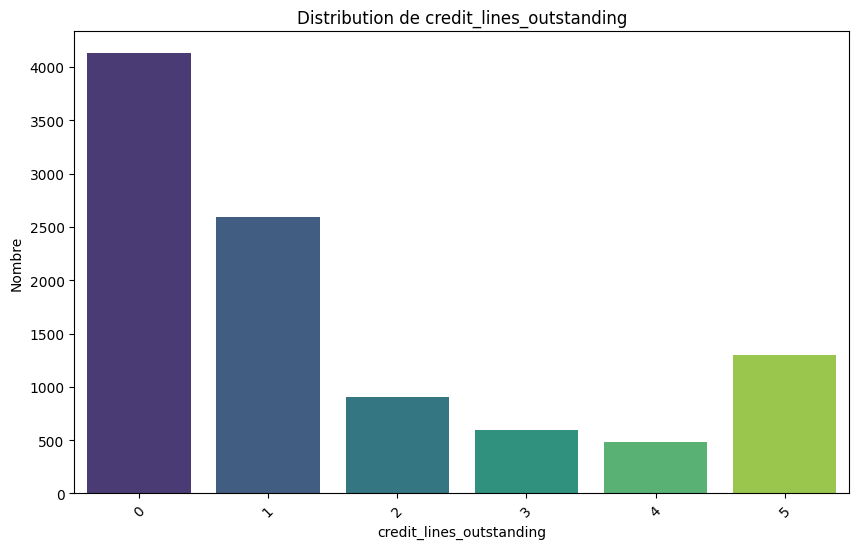

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\1671443595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives


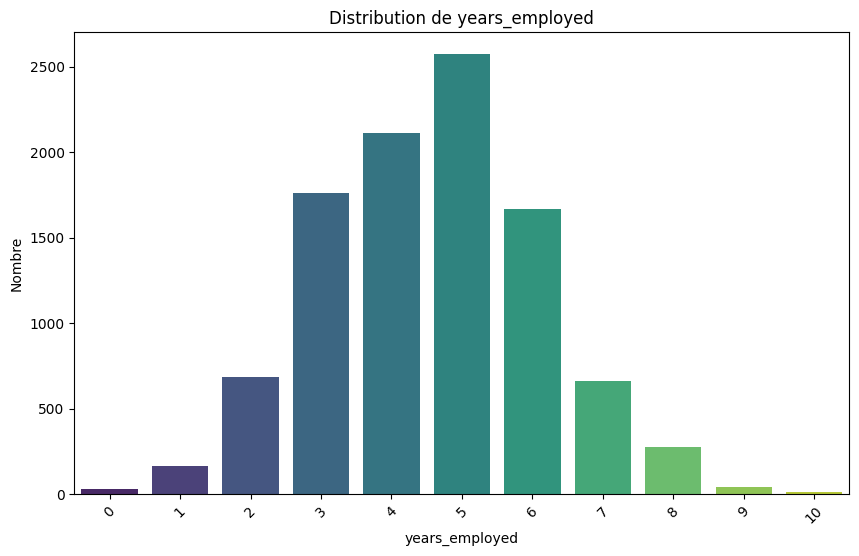

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\1671443595.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives


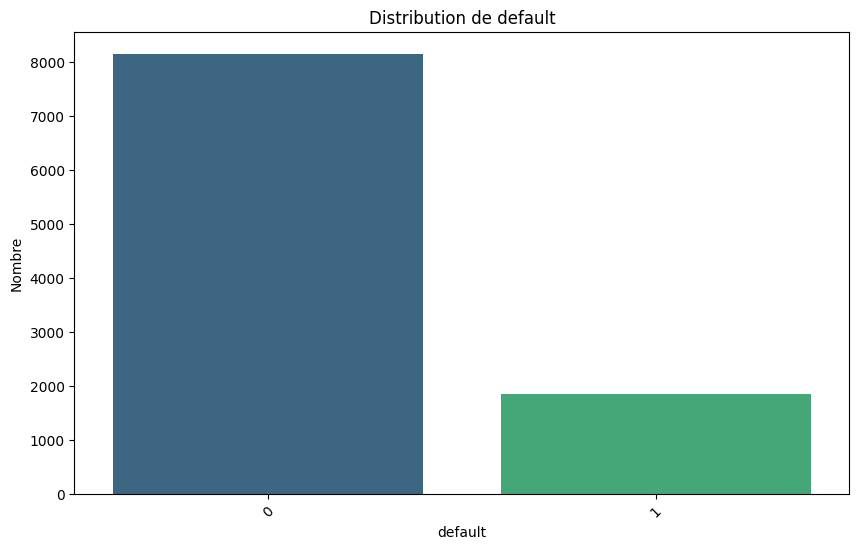

In [11]:
# Création des graphiques en barres
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[var], palette='viridis')  # Utilisation de la palette 'viridis' pour des couleurs vives
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Nombre')
    plt.xticks(rotation=45)  # Rotation des étiquettes si nécessaire
    plt.show()


*Commentaires*

- Concernant la variable **credit_lines_outstanding** :  

La distribution des lignes de crédit en coures révèle une nette concentration sur les comptes à faible endettement, avec une décroissance marquée à mesure que le nombre de lignes augmente, à l'exception d'un pic notable pour 5 lignes de crédit.  
Prédominance des comptes à 0-1 ligne de crédit suggérant une clientèle majoritairement prudente ou à accès limité au crédit.  
Décroissance rapide du nombre de clients  avec l'augmentation des lignes de crédit, indiquant potentiellement des critères d'octroi plus stricts pour les crédits multiples.  
Anomalie intéressante à 5 lignes de crédit, qui pourrait refléter une politique spécifique de l'institution ou un segment de clientèle particulier.

Cette distribution asymétrique, avec une forte concentration sur les faibles nombres de lignes de crédit, souligne l'importance d'une analyse approfondie des facteurs influençant l'accès et l'utilisation du crédit par la clientèle. Elle pourraitégalement impliquer des stratégies de gestion des risques différenciées selon le nombre de lignes de crédit détenues par les clients.

- Concernant la variable **years_employed** :  

La distribution des années d'emploi révèle une structure complexe de la stabilité professionnelle de la clientèle, caractérisée par une concentration modérée et des extrêmes moins représentés.
Concentration autour de 5-6 ans d'emploi, suggérant une base de clients avec une stabilité professionnelle modérée.  
Faible représentation des employés très récents (0-2 ans) et de longue date (9-10 ans), indiquant une clientèle principalement composée de travailleurs en milieu de carrière.  
Décroissance progressive après 6 ans d'emploi, pouvant refléter une certaine mobilité professionnelle ou des changements de carrière dans la population étudiée.  

Cette distribution asymétrique met en lumière l'importance de considérer la durée d'emploi comme un facteur clé dans l'évaluation des risques de crédit et la personnalisation des offres financières. Elle suggère également la nécessité d'une approche nuancée dans la gestion des relations clients, prenant en compte les différents stades de carrière et leurs implications sur la stabilité financière.

- Concernant la variable **default** :   

Prévalence des Clients sans Défaut :  
La majorité des clients dans votre base de données n'ont pas fait défaut sur leurs prêts (représentés par 0). Cela indique une santé financière générale favorable au sein de votre clientèle et suggère que les critères de sélection et de qualification des crédits sont globalement efficaces.  

Existence d'un Risque de Défaut :  
Une proportion notable de clients a fait défaut (représentés par 1). Bien que cet échantillon soit minoritaire, il souligne la nécessité de surveiller attentivement ce segment, car il représente un risque financier potentiel pour votre portefeuille de prêts.  
Nous observons également un déséquilibre des classes, ce qui est important à prendre en compte dans le cadre du choix de la métrique.

Nous obtenons une forte disparité entre les classes à propos de notre variable cible (default). Un tel déséquilibre dans les classes peut biaiser le modèle prédictif vers la classe majoritaire, ce qui réduit la capacité du modèle à identifier correctement les cas de défaut, qui sont moins fréquents mais souvent plus importants à prédire.

**Objectif** : Afin d'améliorer la performance des modèles sur la classe minoritaire et de réduire le biais vers la classe majoritaire, nous appliquons la technique de sur-échantillonnage SMOTE. Cette méthode permet de générer synthétiquement de nouvelles instances de la classe minoritaire pour atteindre un équilibre entre les classes.

**Méthodologie** :

Après avoir analysé les données, nous avons constaté que le jeu de données est déséquilibré, avec une classe majoritaire (non-défaut : 80%) et une classe minoritaire (défaut : 20%). Pour équilibrer les données, nous allons utiliser la technique de rééchantillonnage.

Contenu du déséquilibre des classes, nous avons considéré les Techniques de rééchantillonnage suivantes :

- *Surléchantillonnage aléatoire (Random Oversampling)* : Cette technique consiste à dupliquer aléatoirement les observations de la classe minoritaire pour équilibrer les effectifs.  
- *Sous-échantillonnage aléatoire (Random Undersampling)* : Cette technique consiste à supprimer aléatoirement les observations de la classe majoritaire pour équilibrer les effectifs.  
- *SMOTE (Synthetic Minority Over-sampling Technique)* : Cette technique consiste à générer de nouvelles observations synthétiques de la classe minoritaire en interpolant les observations existantes.  

Choix de la technique de rééchantillonnage  

Après avoir analysé les données, nous avons décidé d'utiliser la technique de SMOTE pour équilibrer les données. Cette technique est particulièrement adaptée pour les jeux de données déséquilibrés avec une classe minoritaire importante.

Nous avons choisi la technique de SMOTE pour les raisons suivantes :

Préservation de l'information : La technique de SMOTE préserve l'information contenue dans les observations de la classe minoritaire en générant de nouvelles observations synthétiques qui sont proches des observations existantes.
Évitement de la perte d'information : La technique de SMOTE évite la perte d'information qui peut survenir lors de la suppression d'observations de la classe majoritaire.
Amélioration de la précision : La technique de SMOTE peut améliorer la précision des modèles de classification en fournissant un échantillon plus représentatif de la classe minoritaire.

**4. Transformation des Données**

*Commentaires*  

*Variables Numériques*  
- **customer_id** : c'est une variable représentant un identifiant unique pour chaque client, il est alors exclu des features car il ne contient pas d'information prédictive

- **loan_amt_outstanding** : montant total en cours sur les prêts actifs, utilisé pour évaluer l'exposition au risque financier, c'est une variable de type numérique (flottant), nous n'avons alors pas besoin de procéder à l'encoding.

- **total_debt_outstanding** : montant total de la dette actuelle, crucial pour l'évaluation du risque de crédit, c'est une variable de type numérique (flottant), nous n'avons alors pas besoin de procéder à l'encoding.

- **total_debt_outstanding** : montant total de la dette actuelle, crucial pour l'évaluation du risque de crédit, c'est une variable de type numérique (flottant), nous n'avons alors pas besoin de procéder à l'encoding.

- **income** : revenu annuel, important pour les modèles prédictifs relatifs à la capacité de paiement, c'est une variable de type numérique (flottant), nous n'avons alors pas besoin de procéder à l'encoding.

- **fico_score** : score FICO du client, un indicateur direct de la santé crédit, c'est une variable de type numérique (entier), nous n'avons alors pas besoin de procéder à l'encoding.  

*Variables de Types Catégorielles*  


Analyse Statistique dans le cas des Variables Catégorielles

- Analyser la Corrélation

In [12]:
# Calculer la corrélation
correlation = df['credit_lines_outstanding'].corr(df['default'])
print(f"Corrélation entre le nombre de lignes de crédit et défaut : {correlation}")

Corrélation entre le nombre de lignes de crédit et défaut : 0.8628152536592015


*Commentaires*  
La corrélation est très élevée, suggérant une forte relation positive entre le nombre de lignes de crédit et la probabilité de défaut. Cela signifie que lorsque le nombre de lignes de crédit augmente, la probabilité de défaut tend également à augmenter.

In [13]:
# Calculer la corrélation
correlation = df['years_employed'].corr(df['default'])
print(f"Corrélation entre le nombre d'années d'emploi du client et défaut : {correlation}")

Corrélation entre le nombre d'années d'emploi du client et défaut : -0.2845056991032378


*Commentaires*  
Une corrélation négative indique que les deux variables évoluent en sens opposés. Dans ce cas, à mesure que le nombre d'années d'emploi augmente, la probabilité de défaut diminue. Cela suggère que les clients qui ont été employés plus longtemps sont moins susceptibles de faire défaut sur leurs prêts.

- Visualisation

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\2406401764.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='credit_lines_outstanding', y='default', data=df, ci=None)


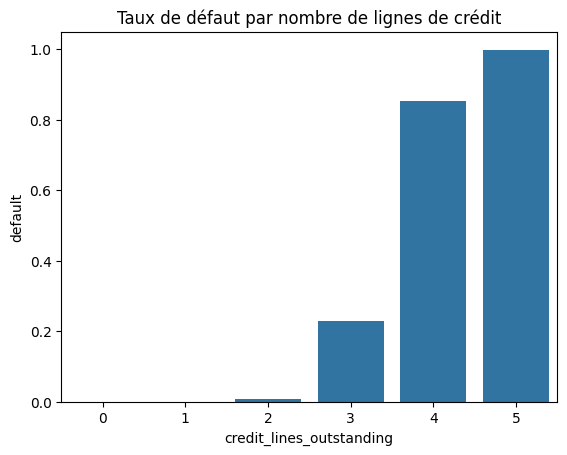

In [14]:
# Diagramme à barres de la moyenne de défaut par nombre de lignes de crédit
sns.barplot(x='credit_lines_outstanding', y='default', data=df, ci=None)
plt.title('Taux de défaut par nombre de lignes de crédit')
plt.show()

*Commentaires*  
Le graphique montre une augmentation claire et constante du taux de défaut à mesure que le nombre de lignes de crédit augmente

**Relation entre Deux Variables Catégorielles**    
- Test du Khi-Deux : Utilisé pour tester l'indépendance entre deux variables catégorielles. Ce test permet de déterminer si les variables sont liées ou non.  
- **Hypothèse Nulle** : Les deux variables sont indépendantes  
- **Hypothèse Alternative** : Les deux variables sont liées  
- **Statistique de Test** : La statistique du Khi-Deux suit une loi de Khi-Deux avec un certain degré de liberté.

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

# Liste des variables catégorielles à tester contre la variable cible 'default'
categorical_vars = ['credit_lines_outstanding', 'years_employed']

# Variable cible
target_var = 'default'

# Boucle pour effectuer le test du Khi-Deux sur chaque variable catégorielle par rapport à la variable cible
for var in categorical_vars:
    # Créez un tableau de contingence entre la variable catégorielle et la variable cible
    contingency_table = pd.crosstab(df[var], df[target_var])
    
    # Effectuez le test du Khi-Deux
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Affichez les résultats avec une vérification pour les p-values très faibles
    if p < 1e-10:  # Si la p-value est très proche de zéro
        print(f"Test du Khi-Deux entre {var} et {target_var}:")
        print(f"Chi2 Statistic: {chi2}, p-value: < 1e-10 (très faible)\n")
    else:
        print(f"Test du Khi-Deux entre {var} et {target_var}:")
        print(f"Chi2 Statistic: {chi2}, p-value: {p}\n")

Test du Khi-Deux entre credit_lines_outstanding et default:
Chi2 Statistic: 8833.861690832404, p-value: < 1e-10 (très faible)

Test du Khi-Deux entre years_employed et default:
Chi2 Statistic: 894.1442625944401, p-value: < 1e-10 (très faible)



*Commentaires*  
Puisque les p-values sont très proches de zéro pour les deux tests, nous rejetons l'hypothèse nulle (H0) avec un haut niveau de confiance.
Cela signifie qu'il existe une association statistiquement significative entre credit_lines_outstanding et default, ainsi qu'entre years_employed et default.  
Il existe alors une relation très significative entre le nombre de lignes de crédit, le nombre d'années d'emploi et le défaut de paiement.
Ces résultats suggèrent que ces variables catégorielles sont des prédicteurs importants pour la variable cible default.

Relation entre les Variables Quantitatives

In [17]:
import pandas as pd

# Liste des variables numériques
numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']

# Variable cible
target_var = 'default'

# Créez un DataFrame avec les variables numériques et la variable cible
data = df[numerical_vars + [target_var]]

# Calculez la corrélation entre chaque variable numérique et la variable cible
correlation = data.corr()[target_var].drop(target_var)

# Affichez le tableau de corrélation
print(correlation)


loan_amt_outstanding      0.098978
total_debt_outstanding    0.758868
income                    0.016309
fico_score               -0.324515
Name: default, dtype: float64


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Séparer les features (X) et la target (y)
X = df.drop('default', axis=1)
y = df['default']

# Appliquer SMOTE avant l'encodage
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Créer un nouveau DataFrame avec les données rééchantillonnées
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['default'])], axis=1)

# Fonction de binning pour years_employed
def bin_years_employed(years):
    if years <= 2:
        return '0-2 years'
    elif years <= 5:
        return '3-5 years'
    elif years <= 8:
        return '6-8 years'
    else:
        return '9+ years'

# Initialiser l'encodeur One-Hot
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Encodage des variables catégorielles
df_resampled['years_employed_binned'] = df_resampled['years_employed'].apply(bin_years_employed)
years_employed_encoded = onehot_encoder.fit_transform(df_resampled[['years_employed_binned']]).toarray()
years_employed_columns = [f'years_employed_{cat}' for cat in onehot_encoder.categories_[0]]

credit_lines_encoded = onehot_encoder.fit_transform(df_resampled[['credit_lines_outstanding']]).toarray()
credit_lines_columns = [f'credit_lines_{cat}' for cat in onehot_encoder.categories_[0]]

# Ajouter les colonnes encodées au DataFrame
df_resampled = pd.concat([
    df_resampled,
    pd.DataFrame(years_employed_encoded, columns=years_employed_columns),
    pd.DataFrame(credit_lines_encoded, columns=credit_lines_columns),
], axis=1)

# Supprimer les colonnes originales
df_resampled.drop(['years_employed', 'years_employed_binned', 'credit_lines_outstanding'], axis=1, inplace=True)

# Ajouter ou conserver les variables numériques
numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
for var in numerical_vars:
    df_resampled[var] = df_resampled[var]  # Indentation corrected here

# Créer de nouvelles features
df_resampled['loan_to_income_ratio'] = df_resampled['loan_amt_outstanding'] / df_resampled['income']
df_resampled['debt_to_income_ratio'] = df_resampled['total_debt_outstanding'] / df_resampled['income']

# Diviser les données en ensembles d'entraînement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop('default', axis=1), df_resampled['default'], test_size=0.2, stratify=df_resampled['default'], random_state=42)

# Vérification des shapes pour s'assurer que la segmentation s'est bien déroulée
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Vérifier la distribution des classes dans les ensembles d'entraînement et de test
print("\nDistribution de la target dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution de la target dans y_test:")
print(y_test.value_counts(normalize=True))



Shape of X_train: (13038, 17)
Shape of X_test: (3260, 17)
Shape of y_train: (13038,)
Shape of y_test: (3260,)

Distribution de la target dans y_train:
default
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribution de la target dans y_test:
default
1    0.5
0    0.5
Name: proportion, dtype: float64


vérifier le type de distribution de chaque variable numérique afin de tester par la suite l'indépendance des variables explicatives avec la variable cible.

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour loan_amt_outstanding:
Statistic: 0.9902148180946146, p-value: 1.1966955270764187e-25



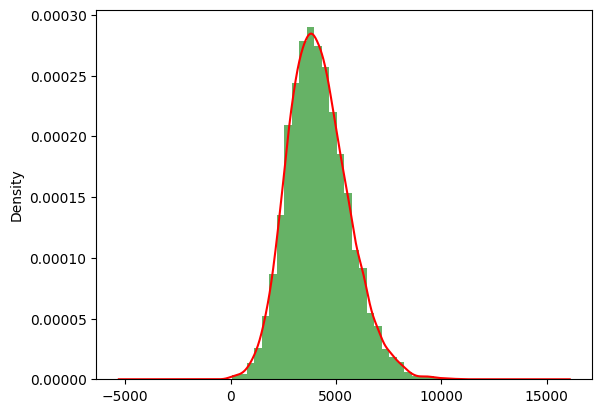

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour total_debt_outstanding:
Statistic: 0.8720951714043387, p-value: 3.0757379686036756e-67



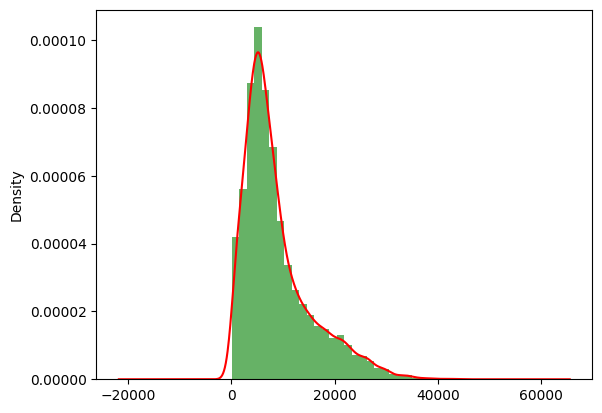

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour income:
Statistic: 0.9997881523672706, p-value: 0.4432160628378845



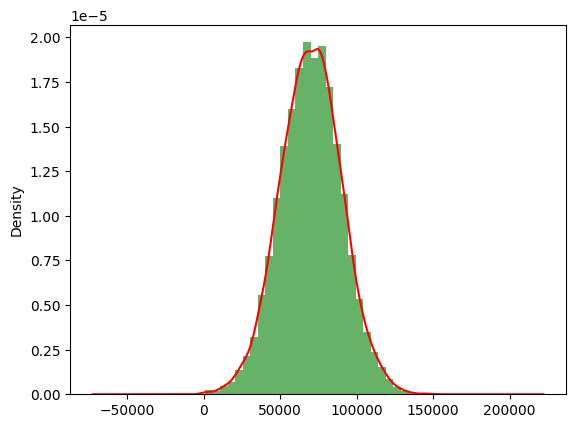

C:\Users\youmn\AppData\Local\Temp\ipykernel_21064\622040096.py:14: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  stat, p = shapiro(df[var])


Test de Shapiro-Wilk pour fico_score:
Statistic: 0.9994488198293282, p-value: 0.0034398178024427867



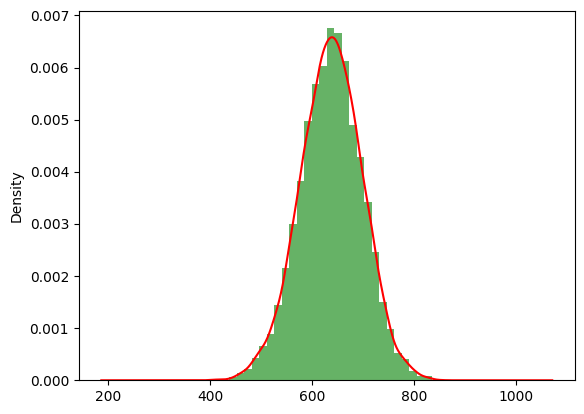

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Liste des variables numériques
numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']

# Boucle pour tracer un histogramme et effectuer le test de Shapiro-Wilk sur chaque variable numérique
for var in numerical_vars:
    # Tracez un histogramme de la variable numérique
    plt.hist(df[var], bins=30, density=True, alpha=0.6, color='g')

    # Effectuez le test de Shapiro-Wilk
    stat, p = shapiro(df[var])

    # Affichez les résultats
    print(f"Test de Shapiro-Wilk pour {var}:")
    print(f"Statistic: {stat}, p-value: {p}\n")

    # Ajoutez une ligne de densité à l'histogramme
    df[var].plot(kind='density', color='red')

    # Affichez le graphique
    plt.show()


*Commentaires*  
Le test de Shapiro-Wilk est utilisé pour évaluer la normalité d'une distribution de données, c'est-à-dire pour tester si une variable suit une distribution normale (gaussienne).  

**Hypothèses du Test de Shapiro-Wilk**  
- *Hypothèse Nulle (H0)*: La variable suit une distribution normale.
- *Hypothèse Alternative (HA)*: La variable ne suit pas une distribution normale.

- Concernant la variable **loan_amt_outstanding** :  
La valeur de la statistique de test est très proche de 1, ce qui indique que les données sont assez proches d'une distribution normale. Plus cette valeur est proche de 1, plus la courbe des données ressemble à une courbe normale.  
Bien que la statistique de test suggère une proximité avec la distribution normale, la très faible p-value et l'avertissement concernant la précision de cette dernière pour les grands échantillons indiquent que vous devriez être prudent avant de conclure définitivement à une non-normalité des données.

- Concernant la variable **total_debt_outstanding** :  
La valeur de la statistique de Shapiro-Wilk inférieure à 1, surtout aussi éloignée de 1 (0.872), indique une divergence notable par rapport à une distribution normale.  
La p-value extrêmement faible (pratiquement 0) permet de rejeter avec confiance l'hypothèse nulle de normalité. Cela signifie que la distribution des données total_debt_outstanding n'est pas normale

- Concernant la variable **income** :  
Une valeur très proche de 1 (0.999788) indique que la distribution des données se rapproche étroitement d'une distribution normale, du moins selon la métrique utilisée par le test de Shapiro-Wilk.  
Une p-value inférieure à 0.05 (typiquement le seuil pour rejeter l'hypothèse nulle) suggère que nous ne sommes pas en mesure de rejeter l'hypothèse nulle , c'est-à-dire que income suit une distribution normale. Ainsi, selon ce test, il n'y a pas de preuves suffisantes pour affirmer que les données ne sont pas normales.

- Concernant la variable **fico_score** :  
La statistique de test très proche de 1 indique que les données sont presque parfaitement normales. Cependant, elle ne l'est pas complètement, comme le montre la p-value.
Une p-value inférieure au seuil conventionnel de 0.05 (ici, 0.0034) suggère que nous devrions rejeter l'hypothèse nulle. Cela signifie que, selon le test de Shapiro-Wilk, fico_score présente des écarts statistiquement significatifs par rapport à une distribution normale.

On réalise plusieurs tests différents pour constater si la distribution de cette variable est normale ou pas (ce sont des tests de vérifications)

In [22]:
from scipy.stats import anderson

result = anderson(df['loan_amt_outstanding'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 21.852943170551953
At 15.0% level, data does not look normal (statistic > critical value).
At 10.0% level, data does not look normal (statistic > critical value).
At 5.0% level, data does not look normal (statistic > critical value).
At 2.5% level, data does not look normal (statistic > critical value).
At 1.0% level, data does not look normal (statistic > critical value).


*Commentaires*  
Le test d'Anderson-Darling est particulièrement sensible aux écarts dans les queues de la distribution par rapport à une distribution normale. Le fait que les données échouent à tous les niveaux de signification indique fortement que la distribution des montants de prêt en cours n'est pas normale.

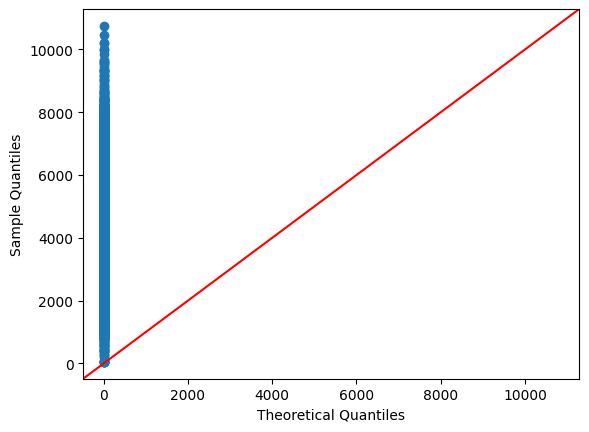

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['loan_amt_outstanding'], line ='45')
plt.show()


*Commentaires*  
Les points du graphique sont très éloignés de la ligne rouge, surtout pour les quantiles inférieurs, et ne suivent pas la tendance linéaire prévue pour une distribution normale. Les points forment une courbe prononcée au départ puis s'éloignent de la ligne sur les extrémités.  
L'écart considérable aux deux extrémités de la distribution indique que les données ont des queues lourdes comparées à une distribution normale. Cela signifie que nous avons plus d'observations avec des valeurs extrêmes (très basses ou très hautes) que ce que l'on attendrait dans une distribution normale.

**Hypothèses du Test d'Anderson-Darling**  
- *Hypothèse Nulle (H0)*: La distribution de la variable total_debt_outstanding suit une distribution normale.
- *Hypothèse Alternative (H1)*: La distribution de la variable total_debt_outstanding ne suit pas une distribution normale.

In [24]:
from scipy.stats import anderson

result = anderson(df['total_debt_outstanding'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 394.43488762901325
At 15.0% level, data does not look normal (statistic > critical value).
At 10.0% level, data does not look normal (statistic > critical value).
At 5.0% level, data does not look normal (statistic > critical value).
At 2.5% level, data does not look normal (statistic > critical value).
At 1.0% level, data does not look normal (statistic > critical value).


*Commentaires*  
Le rejet de l'hypothèse nulle à tous les niveaux de signification signifie que nous avons une preuve statistique forte que les données de **total_debt_outstanding** ne suivent pas une distribution normale. Cela est corroboré par une statistique de test extrêmement élevée comparée aux valeurs critiques.

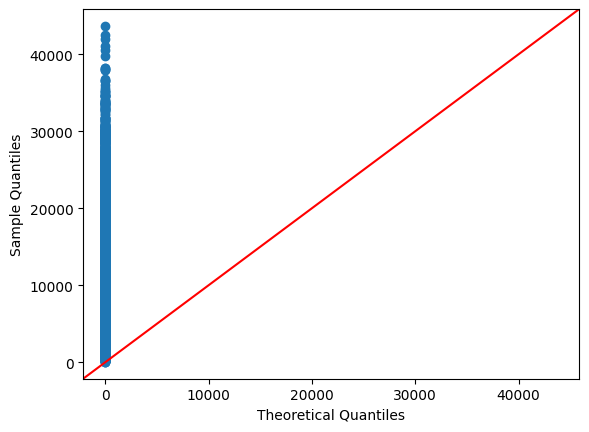

In [25]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['total_debt_outstanding'], line ='45')
plt.show()

In [26]:
from scipy.stats import anderson

result = anderson(df['income'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 0.35578474494650436
At 15.0% level, data looks normal (statistic < critical value).
At 10.0% level, data looks normal (statistic < critical value).
At 5.0% level, data looks normal (statistic < critical value).
At 2.5% level, data looks normal (statistic < critical value).
At 1.0% level, data looks normal (statistic < critical value).


*Commentaires*  
Les valeurs critiques à chaque niveau de signification indiquent que la statistique de test est inférieure à chaque seuil, ce qui permet de conclure à la normalité de la distribution de income à ces niveaux de confiance.  
Le test d'Anderson-Darling est particulièrement utile pour évaluer la normalité sur l'ensemble de la distribution, en mettant un poids supplémentaire sur les queues. Le fait que la statistique de test soit inférieure à toutes les valeurs critiques suggère fortement que income suit une distribution normale.

In [27]:
from scipy.stats import anderson

result = anderson(df['fico_score'], dist='norm')
print("Statistic:", result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% level, data looks normal (statistic < critical value).")
    else:
        print(f"At {sl}% level, data does not look normal (statistic > critical value).")


Statistic: 1.1106138238919812
At 15.0% level, data does not look normal (statistic > critical value).
At 10.0% level, data does not look normal (statistic > critical value).
At 5.0% level, data does not look normal (statistic > critical value).
At 2.5% level, data does not look normal (statistic > critical value).
At 1.0% level, data does not look normal (statistic > critical value).


*Commentaires*  

En utilisant la fonction train_test_split de scikit-learn avec l'option stratify=y pour diviser les données en ensembles d'entraînement et de test tout en maintenant la proportion des classes.
Les distributions des données d'entraînement et de tests montrent que la proportion des classes est presque identique dans les ensembles d'entraînement et de test, ce qui signifie que la stratification a fonctionné correctement pour gérer le déséquilibre des classes.

Model Engineering

arbre de décision

*Commentaires*  
Le code que vous avez partagé implémente une approche de modélisation utilisant un arbre de décision pour prédire une variable cible binaire, default, qui indique probablement si un client va faire défaut sur un prêt ou non. L'arbre de décision est un choix populaire pour les problèmes de classification en raison de sa facilité d'interprétation, de sa capacité à gérer des relations non linéaires, et de sa robustesse face aux variables numériques qui ne suivent pas une distribution normale.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Charger vos données
# df = pd.read_csv("path_to_your_data.csv")
# Supposons que df est déjà chargé et prêt à être utilisé

numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
categorical_vars = ['credit_lines_outstanding', 'years_employed']
target_var = 'default'

class RatioFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.DataFrame(X)  # convertir en DataFrame
        X['loan_to_income_ratio'] = X['loan_amt_outstanding'] / X['income']
        X['debt_to_income_ratio'] = X['total_debt_outstanding'] / X['income']
        return X

numeric_transformer = Pipeline(steps=[
    ('ratio', RatioFeatures()),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_vars),
        ('cat', categorical_transformer, categorical_vars)
    ])

tree_model = DecisionTreeClassifier(random_state=42)

clf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE()),
    ('classifier', tree_model)
])

X = df.drop(target_var, axis=1)
y = df[target_var]

# Calcul des poids pour chaque classe basé sur leur fréquence
weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(zip(np.unique(y), weights))
clf.named_steps['classifier'].set_params(class_weight=class_weights)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

param_grid = {
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score cross-validated:", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Meilleur score cross-validated: 0.9907499999999999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.98      0.98      0.98       370

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Accuracy: 0.9925


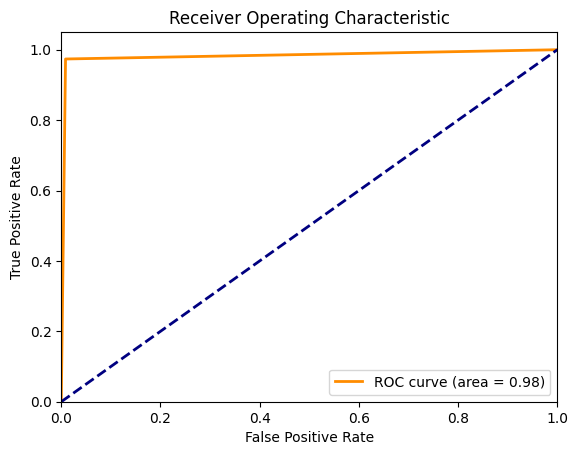

Confusion Matrix:
[[6463   56]
 [  39 1442]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6519
           1       0.96      0.97      0.97      1481

    accuracy                           0.99      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.99      0.99      0.99      8000



In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.utils.class_weight import compute_class_weight

# Charger vos données
# df = pd.read_csv("path_to_your_data.csv")
# Supposons que df est déjà chargé et prêt à être utilisé

# Définition des variables et du target
numerical_vars = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']
categorical_vars = ['credit_lines_outstanding', 'years_employed']
target_var = 'default'

# Ratio Features Transformer
class RatioFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = pd.DataFrame(X)
        X['loan_to_income_ratio'] = X['loan_amt_outstanding'] / X['income']
        X['debt_to_income_ratio'] = X['total_debt_outstanding'] / X['income']
        return X

# Prétraitement
numeric_transformer = Pipeline(steps=[
    ('ratio', RatioFeatures()),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_vars),
        ('cat', categorical_transformer, categorical_vars)
    ])

# Configuration du modèle avec SMOTE
tree_model = DecisionTreeClassifier(random_state=42)
clf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE()),
    ('classifier', tree_model)
])

# Séparation des données
X = df.drop(target_var, axis=1)
y = df[target_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Calcul des poids de classe
weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights = dict(zip(np.unique(y), weights))
clf.named_steps['classifier'].set_params(class_weight=class_weights)

# Validation croisée et prédiction
y_pred = cross_val_predict(clf, X_train, y_train, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Matrice de confusion
y_pred_class = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, y_pred_class)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_train, y_pred_class))


forêts aléatoires

Test Confusion Matrix:
[[1626    4]
 [   6  364]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.98      0.99       370

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



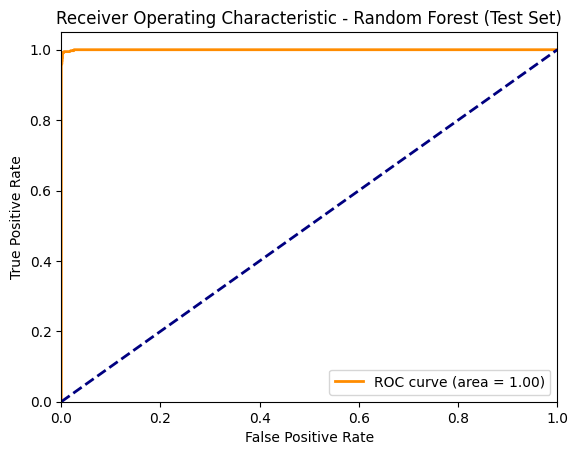

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Ajuster le pipeline complet sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_test = clf.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Test Confusion Matrix:")
print(conf_matrix_test)
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calcul de la courbe ROC et AUC pour l'ensemble de test
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest (Test Set)')
plt.legend(loc="lower right")
plt.show()


Test Confusion Matrix:
[[1627    3]
 [   6  364]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.98      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



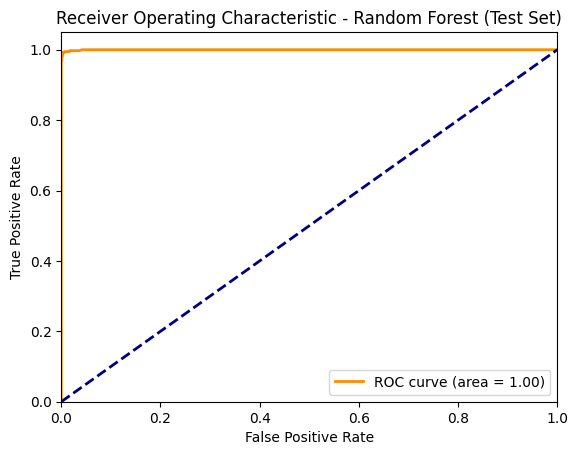

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

# Ajuster le pipeline complet sur les données d'entraînement
clf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_test = clf.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Test Confusion Matrix:")
print(conf_matrix_test)
print("\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calcul de la courbe ROC et AUC pour l'ensemble de test
y_pred_proba_test = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest (Test Set)')
plt.legend(loc="lower right")
plt.show()


In [51]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Validation croisée répétée
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=rskf, scoring='roc_auc')

# Suivi des scores AUC moyens
print(f'AUC moyenne sur la validation croisée: {np.mean(scores):.2f}')


AUC moyenne sur la validation croisée: 1.00


validation croisée

In [78]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Définition du générateur de plis stratifiés
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validation croisée avec 5 plis en utilisant le scoring AUC-ROC
scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')

# Affichage du score AUC-ROC moyen sur les 5 plis de validation croisée
print("\nAUC-ROC moyen sur 5 plis de validation croisée:", np.mean(scores))


AUC-ROC moyen sur 5 plis de validation croisée: 0.9992076054744654


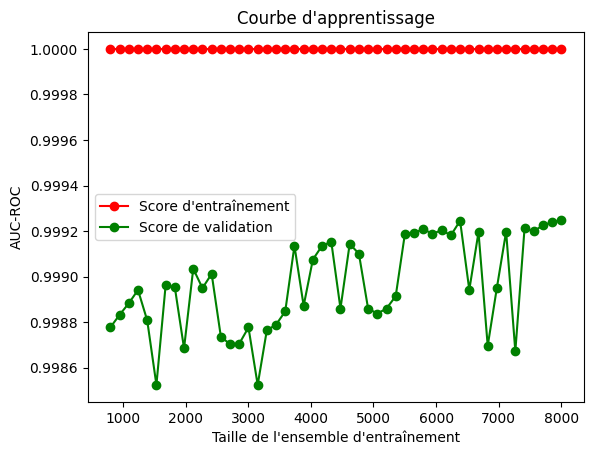

In [79]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 50))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Score d\'entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Score de validation')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('AUC-ROC')
plt.legend(loc='best')
plt.title('Courbe d\'apprentissage')
plt.show()

Interprétation :  

### Mise en évidence des Résultats Exceptionnels et Problèmes Potentiels

Les résultats obtenus montrent des **performances exceptionnellement élevées** avec des **AUC-ROC proches de 1.00**, des scores de **précision, rappel et f1-score proches de 1.00** ainsi qu'une **courbe d'apprentissage** montrant une séparation nette entre l'ensemble d'entraînement et l'ensemble de validation. Bien que ces résultats semblent idéaux, ils soulèvent plusieurs **problèmes potentiels**, en particulier dans le contexte de la prédiction de défaut de paiement.

### Analyse des Résultats Exceptionnels

1. **AUC-ROC et Scores de Validation Exceptionnels** :
   - L'**AUC-ROC moyen** sur 5 plis de validation croisée est de 0.9992, ce qui signifie que le modèle distingue presque parfaitement entre les classes de défaillants et de non-défaillants. L'AUC-ROC du test set est également très proche de 1.00.
   - **Précision, rappel et F1-score** : Les scores sont également très proches de 1.00, suggérant que le modèle fait très peu d'erreurs, aussi bien pour la classe majoritaire que pour la classe minoritaire.

2. **Courbe d'apprentissage** :
   - Sur la **courbe d'apprentissage**, le score d'entraînement (rouge) est **parfait** (AUC-ROC de 1.00) pour toutes les tailles de l'ensemble d'entraînement. Cela montre que le modèle apprend parfaitement sur les données d'entraînement.
   - Le **score de validation** (vert) varie légèrement mais reste extrêmement élevé, avec des AUC proches de 1.00. Bien qu'il y ait une petite variance, cela pourrait indiquer que le modèle surapprend.

3. **Confusion Matrix et Classification Report** :
   - La **matrice de confusion** montre très peu d'erreurs : seulement 3 faux positifs et 6 faux négatifs sur 2000 observations, ce qui donne une précision, un rappel et un score F1 très élevés.
   - Cela signifie que presque tous les cas de défaut de paiement et de non-défaut sont bien prédits.

### Problèmes que ces Résultats Sous-entendent

Les résultats exceptionnellement élevés ne sont **pas toujours un signe positif**. Voici les **problèmes sous-jacents** qui peuvent exister derrière ces performances parfaites :

#### 1. **Surapprentissage (Overfitting)**
- **Surapprentissage sur les Données d'Entraînement** : Le fait que le modèle atteigne un AUC-ROC parfait sur l'ensemble d'entraînement, quelle que soit la taille, est un **indicateur fort de surapprentissage**. Le modèle pourrait avoir **mémorisé** les données d'entraînement, au lieu d'apprendre des schémas généralisables.
- **Impact** : Bien que le modèle fonctionne parfaitement sur les données d'entraînement et de validation, il pourrait **échouer à généraliser** correctement sur des données totalement nouvelles. Cela est souvent observé dans des scénarios où les données de test ou de validation sont trop similaires aux données d'entraînement.

#### 2. **Déséquilibre des Classes**
- **Classe Majoritaire Dominante** : Si les classes sont **déséquilibrées**, comme cela arrive souvent dans la prédiction des défauts de paiement (moins de clients défaillants que non-défaillants), le modèle peut avoir tendance à prédire majoritairement la classe majoritaire. Dans ce cas, il serait relativement facile d'obtenir des scores élevés si la majorité des observations sont bien classées, en dépit de performances médiocres sur la classe minoritaire (défaillants).
- **Faux Confort dans les Scores Élevés** : Un **précision et un rappel proches de 1.00** peuvent masquer des problèmes avec la classe minoritaire si le modèle est **biaisé vers la classe majoritaire**. Par exemple, si le nombre de défauts est très faible, le modèle peut prédire correctement la majorité (non-défaillants), mais échouer à prédire correctement les défaillants, ce qui aurait un impact négatif en production.

#### 3. **Fuite de Données (Data Leakage)**
- **Fuite de Données** : Si les données d'entraînement et de test partagent des caractéristiques très similaires ou si des informations issues du futur sont incluses dans les données d'entraînement, cela peut conduire à des résultats irréalistes. Un **AUC parfait** pourrait suggérer que le modèle a accès à des informations qu'il ne devrait pas avoir (comme des variables corrélées aux résultats ou des erreurs dans le partitionnement des données).
- **Impact** : En production, lorsque ces informations ne sont plus disponibles, les performances du modèle peuvent chuter de manière significative.

#### 4. **Modèle Trop Complexe**
- **Complexité du Modèle** : Un modèle de **Random Forest** avec des arbres très profonds et de nombreux estimateurs peut **surajuster** les données. Il peut capturer des **bruits** ou des relations spécifiques à l'ensemble d'entraînement, ce qui donne l'illusion de bonnes performances, mais conduit à des problèmes de généralisation.
- **Impact** : En production, ce modèle complexe peut être moins performant, notamment sur des scénarios inattendus ou lorsque la distribution des données change légèrement.


### Conclusion

Bien que vos résultats montrent des performances parfaites, cela peut cacher plusieurs problèmes, notamment un **surapprentissage**, un **biais vers la classe majoritaire** ou une **fuite de données**. Ces indicateurs doivent pousser à utiliser ces résultats avec prudence :  la robustesse de notre modèle avant de le déployer en production, en particulier en prêtant attention à la classe minoritaire (défaillants) et en ajustant le modèle pour qu'il soit plus généralisable.

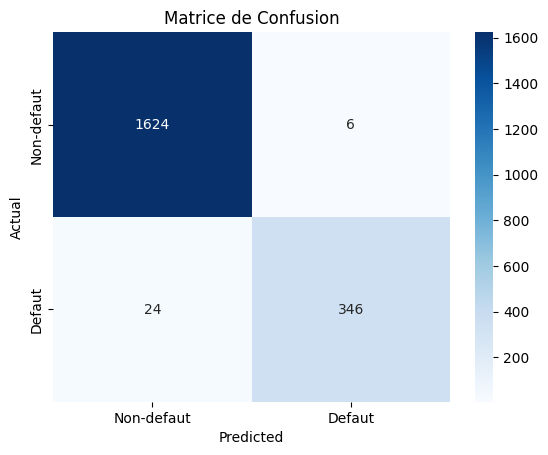

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-defaut', 'Defaut'], yticklabels=['Non-defaut', 'Defaut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion')
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits

Rapport de classification:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1630
           1       0.98      0.93      0.96       370

    accuracy                           0.98      2000
   macro avg       0.98      0.96      0.97      2000
weighted avg       0.98      0.98      0.98      2000

AUC-ROC: 0.9989603714143591


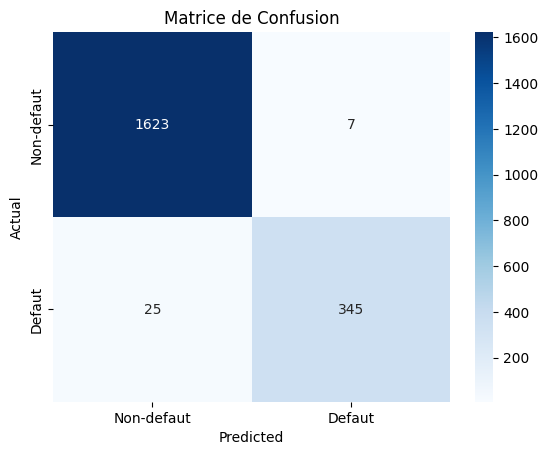

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Séparer les features (X) et la target (y)
X = df_onehot.drop('default', axis=1)
y = df_onehot['default']

# Diviser les données en ensembles d'entraînement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Définir les hyperparamètres pour la recherche aléatoire
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle de forêts aléatoires avec les poids ajustés
class_weights = {0: 1, 1: len(y_train[y_train==0]) / len(y_train[y_train==1])}
rf = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Configurer RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=20, scoring='roc_auc', cv=3, verbose=1, random_state=42, n_jobs=-1)

# Exécuter la recherche aléatoire
random_search.fit(X_train, y_train)

# Meilleur modèle trouvé
best_rf = random_search.best_estimator_

# Prédictions et évaluation avec le meilleur modèle
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Rapport de classification et AUC-ROC
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-defaut', 'Defaut'], yticklabels=['Non-defaut', 'Defaut'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion')
plt.show()


regression logistique


Shape of X_train: (8000, 18)
Shape of X_test: (2000, 18)
Shape of y_train: (8000,)
Shape of y_test: (2000,)

Distribution de la target dans y_train:
default
0    0.814875
1    0.185125
Name: proportion, dtype: float64

Distribution de la target dans y_test:
default
0    0.815
1    0.185
Name: proportion, dtype: float64

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1630
           1       0.93      0.99      0.96       370

    accuracy                           0.98      2000
   macro avg       0.96      0.99      0.97      2000
weighted avg       0.98      0.98      0.98      2000


Matrice de confusion:
[[1602   28]
 [   4  366]]

AUC-ROC Score:
0.9995440225501575

Coefficients du modèle:
                     feature  coefficient
17      debt_to_income_ratio     4.832111
15            credit_lines_5     3.386947
2     total_debt_outstanding     2.915863
11            credit_lines_1    -2.017100
6  

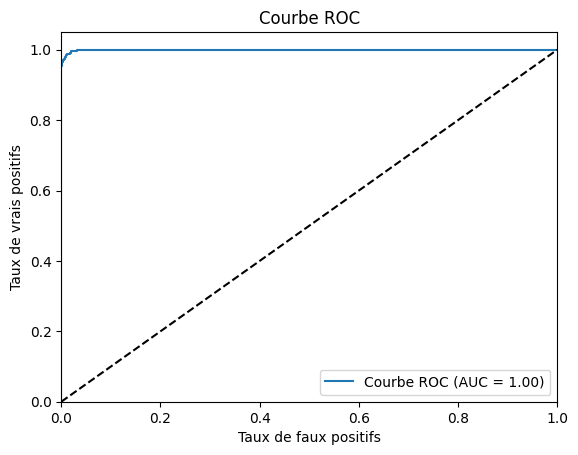

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# Séparer les features (X) et la target (y)
X = df_onehot.drop('default', axis=1)
y = df_onehot['default']

# Diviser les données en ensembles d'entraînement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vérification des shapes pour s'assurer que la segmentation s'est bien déroulée
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Vérifier la distribution des classes dans les ensembles d'entraînement et de test
print("\nDistribution de la target dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution de la target dans y_test:")
print(y_test.value_counts(normalize=True))

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculer les poids des classes
class_weights = dict(zip(np.unique(y), y.value_counts(normalize=True)))
class_weights = {k: 1/v for k, v in class_weights.items()}

# Créer et entraîner le modèle de régression logistique avec les poids ajustés
log_reg = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Faire des prédictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Évaluer le modèle
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Afficher les coefficients du modèle
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values('coefficient', key=abs, ascending=False)
print("\nCoefficients du modèle:")
print(coefficients)

# Tracer la courbe ROC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


Shape of X_train: (8000, 18)
Shape of X_test: (2000, 18)
Shape of y_train: (8000,)
Shape of y_test: (2000,)

Distribution de la target dans y_train:
default
0    0.814875
1    0.185125
Name: proportion, dtype: float64

Distribution de la target dans y_test:
default
0    0.815
1    0.185
Name: proportion, dtype: float64
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Meilleurs paramètres: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1630
           1       0.93      0.99      0.96       370

    accuracy                           0.98      2000
   macro avg       0.96      0.99      0.97      2000
weighted avg       0.98      0.98      0.98      2000


Matrice de confusion:
[[1602   28]
 [   4  366]]

AUC-ROC Score:
0.9995274415519814

Coefficients du modèle:
                     feature  coefficient
17      debt_to_income_ratio     7.7083

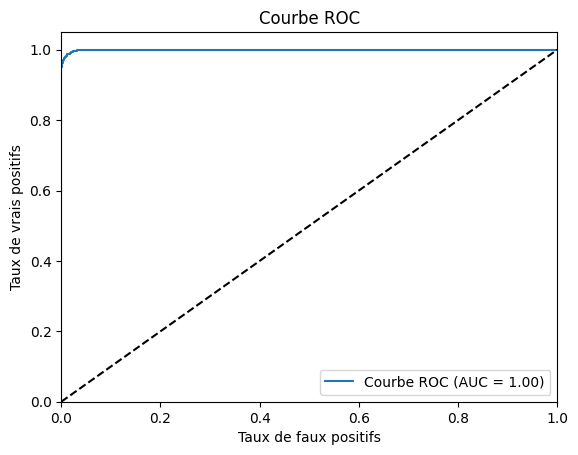

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Séparer les features (X) et la target (y)
X = df_onehot.drop('default', axis=1)
y = df_onehot['default']

# Diviser les données en ensembles d'entraînement et de test en stratifiant par la target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vérification des shapes pour s'assurer que la segmentation s'est bien déroulée
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Vérifier la distribution des classes dans les ensembles d'entraînement et de test
print("\nDistribution de la target dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution de la target dans y_test:")
print(y_test.value_counts(normalize=True))

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculer les poids des classes
class_weights = dict(zip(np.unique(y), y.value_counts(normalize=True)))
class_weights = {k: 1/v for k, v in class_weights.items()}

# Définir les hyperparamètres à optimiser
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Créer le modèle de régression logistique avec les poids ajustés
log_reg = LogisticRegression(class_weight=class_weights, random_state=42, max_iter=1000)

# Utiliser GridSearchCV pour l'optimisation des hyperparamètres
grid_search = GridSearchCV(log_reg, param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres
print("\nMeilleurs paramètres:", grid_search.best_params_)

# Entraîner le modèle avec les meilleurs paramètres
best_log_reg = grid_search.best_estimator_

# Faire des prédictions
y_pred = best_log_reg.predict(X_test_scaled)
y_pred_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Évaluer le modèle
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))

print("\nAUC-ROC Score:")
print(roc_auc_score(y_test, y_pred_proba))

# Afficher les coefficients du modèle
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': best_log_reg.coef_[0]})
coefficients = coefficients.sort_values('coefficient', key=abs, ascending=False)
print("\nCoefficients du modèle:")
print(coefficients)

# Tracer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Courbe ROC (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()